In [76]:
import warnings
warnings.filterwarnings('ignore')

## Imports and Env Variables

In [77]:
import os

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import numpy as np
import pandas as pd

In [78]:
biplot_fig_size = (20, 7)
triplot_fig_size = (30, 9)

colors = ["#219C90", "#4374B3", "#EE9322", "#D83F31"]
sns.set_palette(sns.color_palette(colors))

sns_pallete_paired = sns.color_palette(palette="Paired")
sns_pallete_multiclass = sns.color_palette(palette="muted")

In [79]:
# paths -----------------------------------------------------------

# train
path_plain_train = "../Dataset/train/Plain/"
path_pothole_train = "../Dataset/train/Pothole/"


# test
path_plain_test = "../Dataset/test/Plain/"
path_pothole_test = "../Dataset/test/Pothole/"

# combined
dataset_paths = [path_plain_train, path_pothole_train, path_plain_test, path_pothole_test]

## Data extraction And Cleaning

In [80]:
def avg_intensities(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        b_array, g_array, r_array = cv2.split(image)
        b = b_array.mean()
        g = g_array.mean()
        r = r_array.mean()
        return b, g, r
    else:
        return np.nan,np.nan,np.nan

In [81]:
def extractImageData() -> pd.DataFrame:
# [
#     {size: (x * y * channels), resolution: [x,y]},
#     {...}
# ]
    data = []
    for image_path in dataset_paths:
        image_paths = os.listdir(image_path)
        for file_name in image_paths:
            className = ""
            img_data = {}

            # data extraction ==========================================================================================
            # image class extraction
            if("plain" in image_path.lower()):
                className = "Plain"
            else:
                className = "Pothole"

            try:
                img_arr = np.asarray(Image.open(image_path + file_name))            
            except:
                print(image_path + file_name, img_arr.shape)
                continue

            # Image rgb intensity exrtaction
            b_mean, g_mean, r_mean = avg_intensities(image_path + file_name)

            # image dims extraction
            img_data["Size"], img_data["resolution"] = np.prod(img_arr.shape), [img_arr.shape[0], img_arr.shape[1]]

            # img data dumping
            record = {
                        "Path": image_path + file_name,
                        "Class": className,
                        "Size": np.prod(img_arr.shape),
                        "Height": img_arr.shape[0],
                        "Width": img_arr.shape[1],
                        "Ratio": img_arr.shape[1] / img_arr.shape[0],
                        "Avg_Red": r_mean,
                        "Avg_Green": g_mean,
                        "Avg_Blue": b_mean,
                    }
            data.append(record)
    image_data = pd.DataFrame(data)
    return image_data

In [82]:
image_data = None
if("image_data.csv" in os.listdir(os.getcwd())):
    image_data = pd.read_csv("./image_data.csv")
else:
    image_data = extractImageData()
    image_data.to_csv("image_data.csv")

In [83]:
image_data.isna().sum()

Unnamed: 0    0
Path          0
Class         0
Size          0
Height        0
Width         0
Ratio         0
Avg_Red       2
Avg_Green     2
Avg_Blue      2
dtype: int64

In [84]:
# Print the rows where any column contains a null value
print(image_data[image_data.isna().any(axis=1)]['Path'])

234    ../Dataset/train/Plain/340.imagef7973d0b-ad11-...
366    ../Dataset/train/Plain/97.b6d690f129694c2d824c...
Name: Path, dtype: object


In [85]:
image_data.dropna(inplace=True)#removing files which are not images .DS_store etc
image_data

,Unnamed: 0,Path,Class,Size,Height,Width,Ratio,Avg_Red,Avg_Green,Avg_Blue
0,0,../Dataset/train/Plain/1.6.jpg,Plain,126000,150,280,1.866667,146.768952,153.281667,111.880119
1,1,../Dataset/train/Plain/1.jpg,Plain,411840,352,390,1.107955,143.278424,146.874221,146.839103
2,2,../Dataset/train/Plain/1.Longeststraight0.jpg,Plain,1244700,461,900,1.952278,136.761241,135.845852,131.584261
3,3,../Dataset/train/Plain/1.maxresdefault.jpg,Plain,2764800,720,1280,1.777778,116.239030,122.716315,103.446075
4,4,../Dataset/train/Plain/1.smooth_road_resize_md...,Plain,868248,389,744,1.912596,121.533751,134.592773,147.923415
...,...,...,...,...,...,...,...,...,...,...
734,734,../Dataset/test/Pothole/4.jpg,Pothole,143379,179,267,1.491620,145.357416,140.901973,136.004540
735,735,../Dataset/test/Pothole/5.jpg,Pothole,360000,300,400,1.333333,98.649483,97.031675,80.764633
736,736,../Dataset/test/Pothole/6.jpg,Pothole,501000,334,500,1.497006,186.632090,184.870347,174.291138
737,737,../Dataset/test/Pothole/7.jpg,Pothole,1440000,600,800,1.333333,83.806704,86.313898,85.447627


In [86]:
image_data.isna().sum()

Unnamed: 0    0
Path          0
Class         0
Size          0
Height        0
Width         0
Ratio         0
Avg_Red       0
Avg_Green     0
Avg_Blue      0
dtype: int64

## Color Data Analysis

#### The question at hand is whether there is a significant difference in the average intensities of the red, green and blue color channels in the images of both the classes or not, can we classify Images on the basis of their average color channels’ intensities or not.

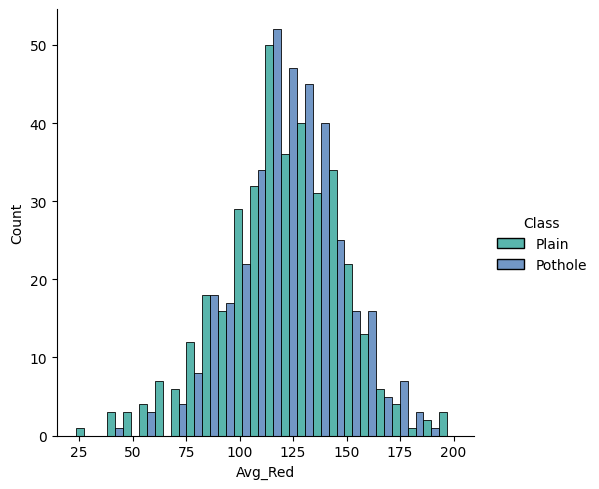

In [87]:
sns.displot(data=image_data, x="Avg_Red", hue="Class",multiple="dodge")
plt.show()

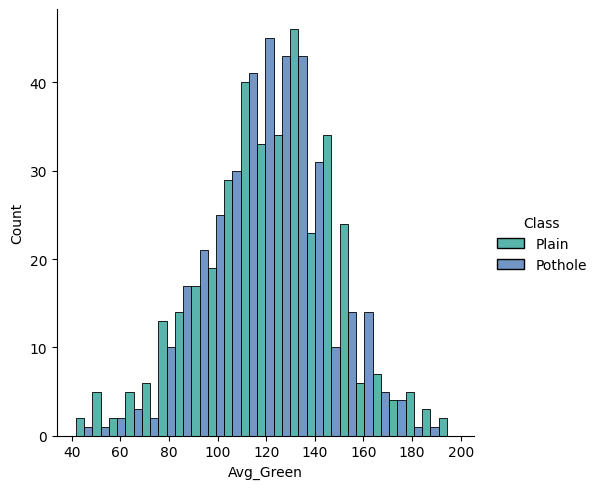

In [88]:
sns.displot(data=image_data, x="Avg_Green", hue="Class",multiple="dodge")
plt.show()

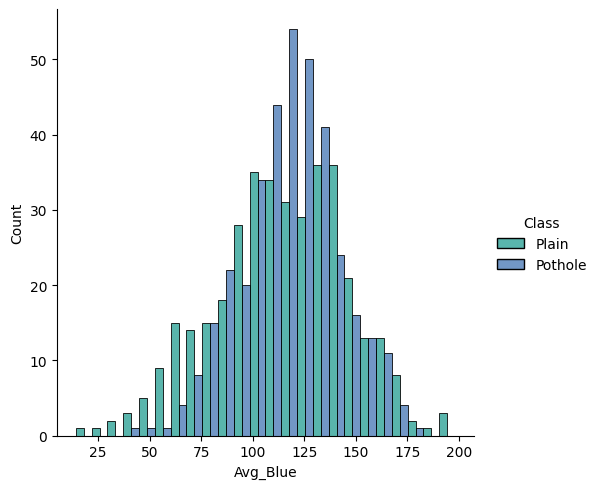

In [89]:
sns.displot(data=image_data, x="Avg_Blue", hue="Class",multiple="dodge")
plt.show()

#### Inference: in the distribution plots of the red and green channels, the difference in their average intensities is not clear, but in the case of blue channel, images in the pothole class have higher average intensity values of blue channel.

In [90]:
plain_data = image_data[image_data['Class'] == 'Plain']
pothole_data = image_data[image_data['Class'] == 'Pothole']

#### To validate the deduction, we will make the use of KDE and violin plots, since violin plot provides the summary of distribution in a straightforward manner.

Text(0.5, 1.0, 'Blue Channel Distribution')

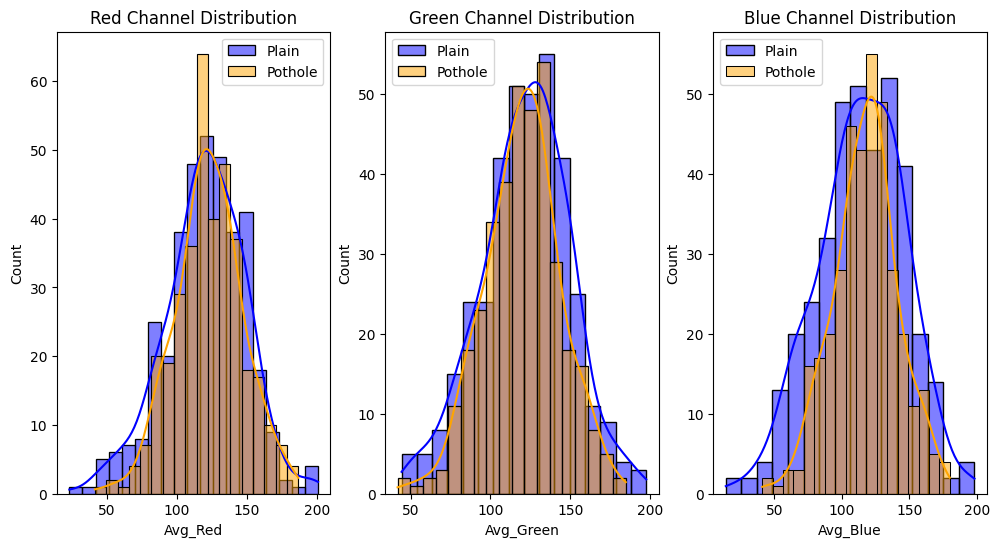

In [91]:
# Histograms and distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=plain_data, x='Avg_Red', kde=True, label='Plain', color='blue')
sns.histplot(data=pothole_data, x='Avg_Red', kde=True, label='Pothole', color='orange')
plt.legend()
plt.title('Red Channel Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=plain_data, x='Avg_Green', kde=True, label='Plain', color='blue')
sns.histplot(data=pothole_data, x='Avg_Green', kde=True, label='Pothole', color='orange')
plt.legend()
plt.title('Green Channel Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=plain_data, x='Avg_Blue', kde=True, label='Plain', color='blue')
sns.histplot(data=pothole_data, x='Avg_Blue', kde=True, label='Pothole', color='orange')
plt.legend()
plt.title('Blue Channel Distribution')

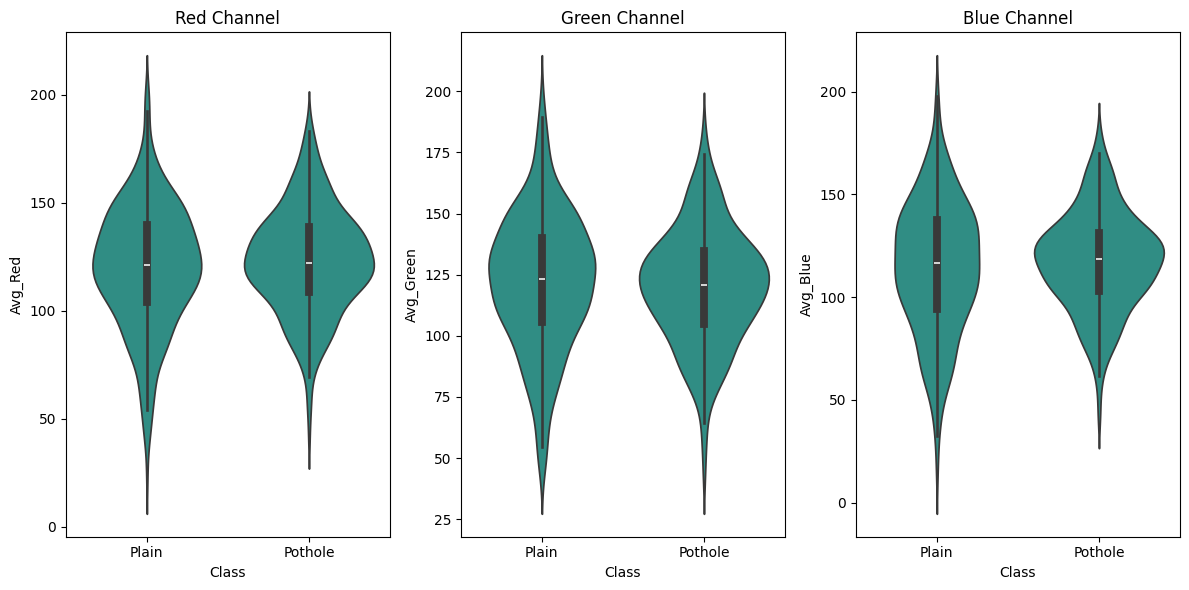

In [92]:
# Violin plot for RGB values comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.violinplot(x='Class', y='Avg_Red', data=image_data)
plt.title('Red Channel')

plt.subplot(1, 3, 2)
sns.violinplot(x='Class', y='Avg_Green', data=image_data)
plt.title('Green Channel')

plt.subplot(1, 3, 3)
sns.violinplot(x='Class', y='Avg_Blue', data=image_data)
plt.title('Blue Channel')

plt.tight_layout()

#### color channel analysis conclusions:
The overall color channel intensities of images in pothole class were higher than those of the plain class, but the difference is not significant enough for it to be use as a feature/parameter for classification task. 

The difference in the blue channel seemed a bit higher by analyzing the distribution plot but from analyzing the violin plot and KDE function of distribution plot, the conclusion made aligned with the inference made from red and green intensities

## Image Size Analysis

The purpose of this analysis will be to decide what the suitable image size for resizing the entire dataset for uniformity will be.

**size = (Width x Height x Channels)**

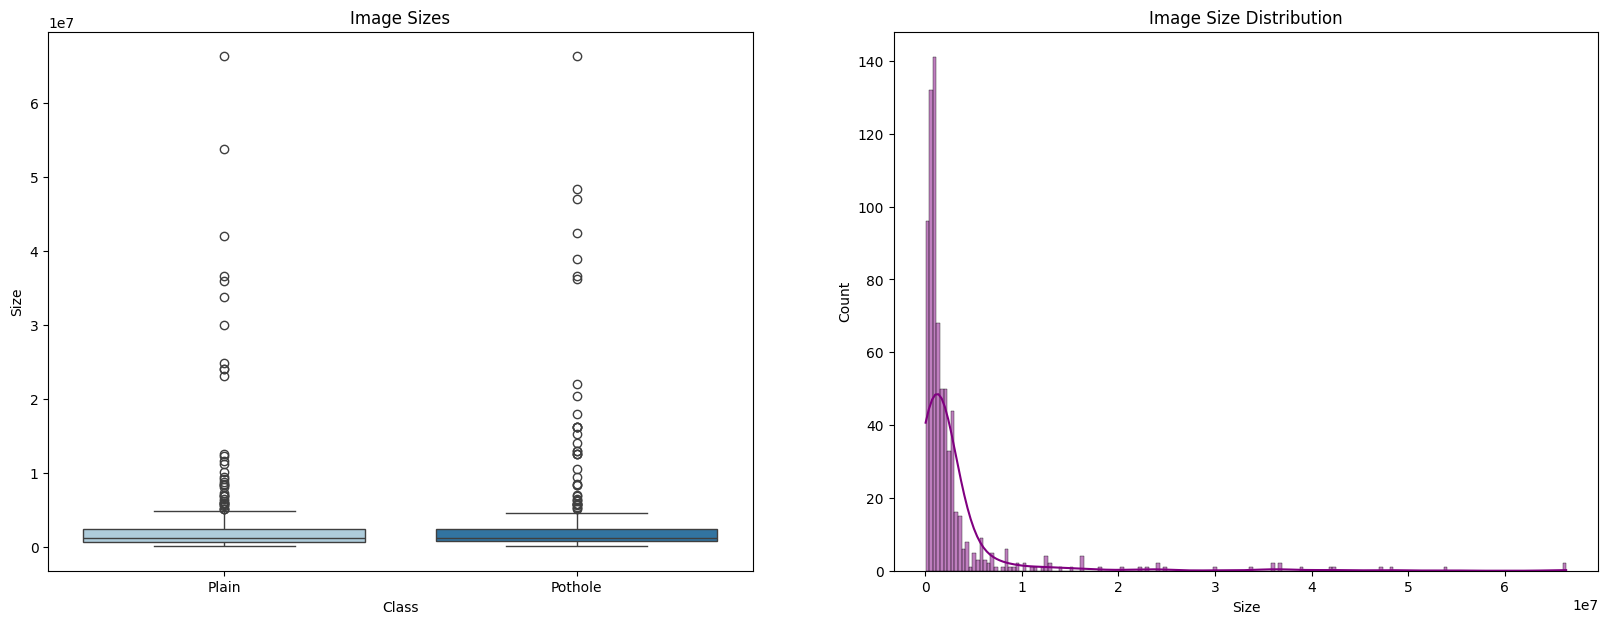

In [93]:
plt.figure(figsize=biplot_fig_size)
plt.subplot(1,2,1)
ax = sns.boxplot(data=image_data, x=image_data["Class"], y=image_data["Size"], palette=sns_pallete_paired)
plt.title("Image Sizes")

plt.subplot(1,2,2)
# plt.figure(figsize=custom_fig_size),
sns.histplot(image_data["Size"], color="purple", kde=True)
# plt.axvline(x=data["Size"].median(),
#             color='#52cbff',
#             ls='-', 
#             lw=1)
plt.title("Image Size Distribution")

plt.show()

we can observe siginificant number of outliers

So we further visualize the size distributions more clearly

In [94]:
print(f"Mean size: {image_data['Size'].mean().__round__(2)}")
print(f"Median of Size: {image_data['Size'].median().__round__(2)}")
print(f"Standard Dev of Size: {image_data['Size'].std().__round__(2)}")
print(f"Range of size in boxplot box: {image_data['Size'].quantile(0.25).__round__(2)} to {image_data['Size'].quantile(0.75).__round__(2)}")

Mean size: 2939190.19
Median of Size: 1166400.0
Standard Dev of Size: 6655572.25
Range of size in boxplot box: 734580.0 to 2418900.0


2d histogram plot

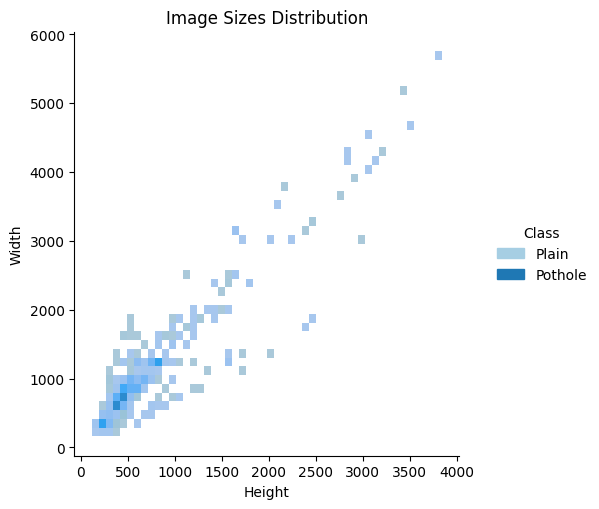

In [95]:
sns.displot(image_data, x="Height", y="Width", hue="Class", palette=sns_pallete_paired)
plt.title('Image Sizes Distribution')
plt.show()

Histogram plots for height, width and ratio

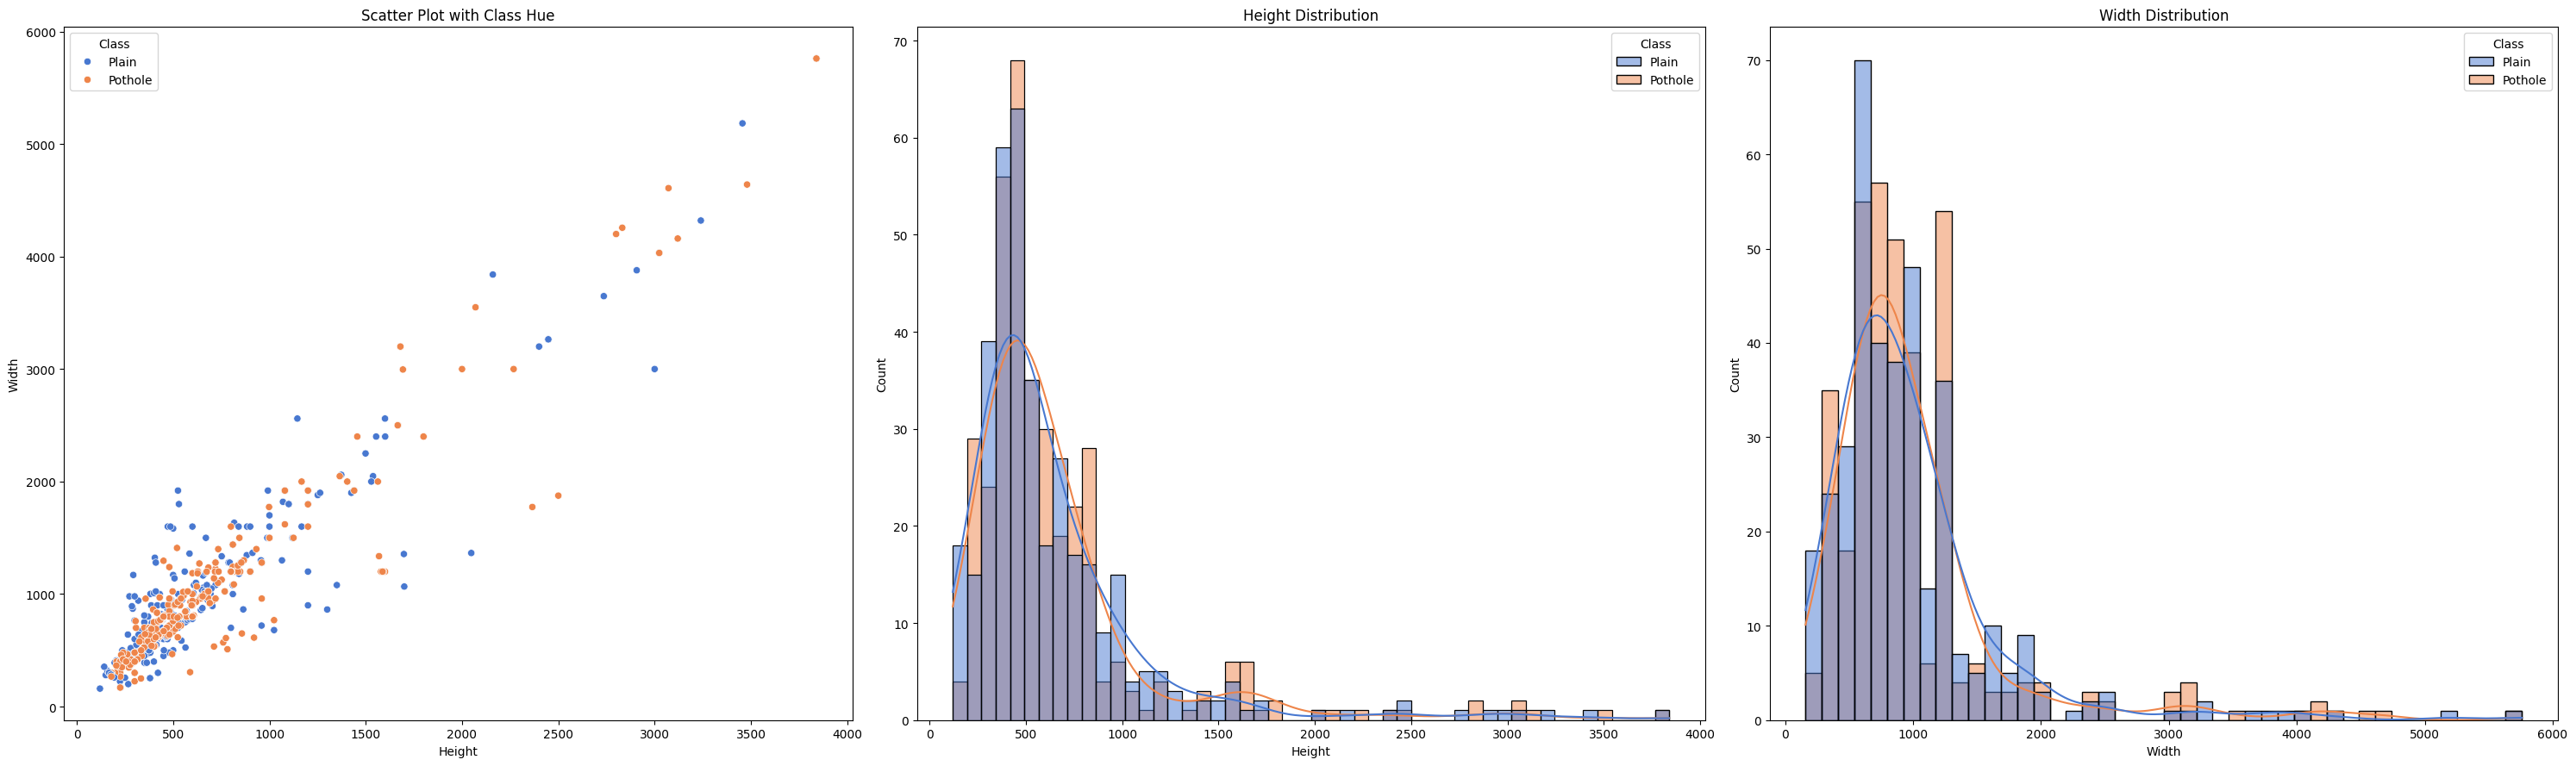

In [96]:
plt.figure(figsize=triplot_fig_size)

# Subplot 1: Scatter plot with hue
plt.subplot(1, 3, 1)
sns.scatterplot(data=image_data, x="Height", y="Width", hue="Class", palette=sns_pallete_multiclass)
plt.title('Scatter Plot with Class Hue')

# Subplot 2: Histogram for Height
plt.subplot(1, 3, 2)
sns.histplot(data=image_data, x="Height", hue="Class", kde=True, palette=sns_pallete_multiclass)  # Add KDE for better distribution visualization
plt.title('Height Distribution')

# Subplot 3: Histogram for Width
plt.subplot(1, 3, 3)
sns.histplot(data=image_data, x="Width", hue="Class", kde=True, palette=sns_pallete_multiclass)  # Add KDE for better distribution visualization
plt.title('Width Distribution')

plt.tight_layout()

plt.show()

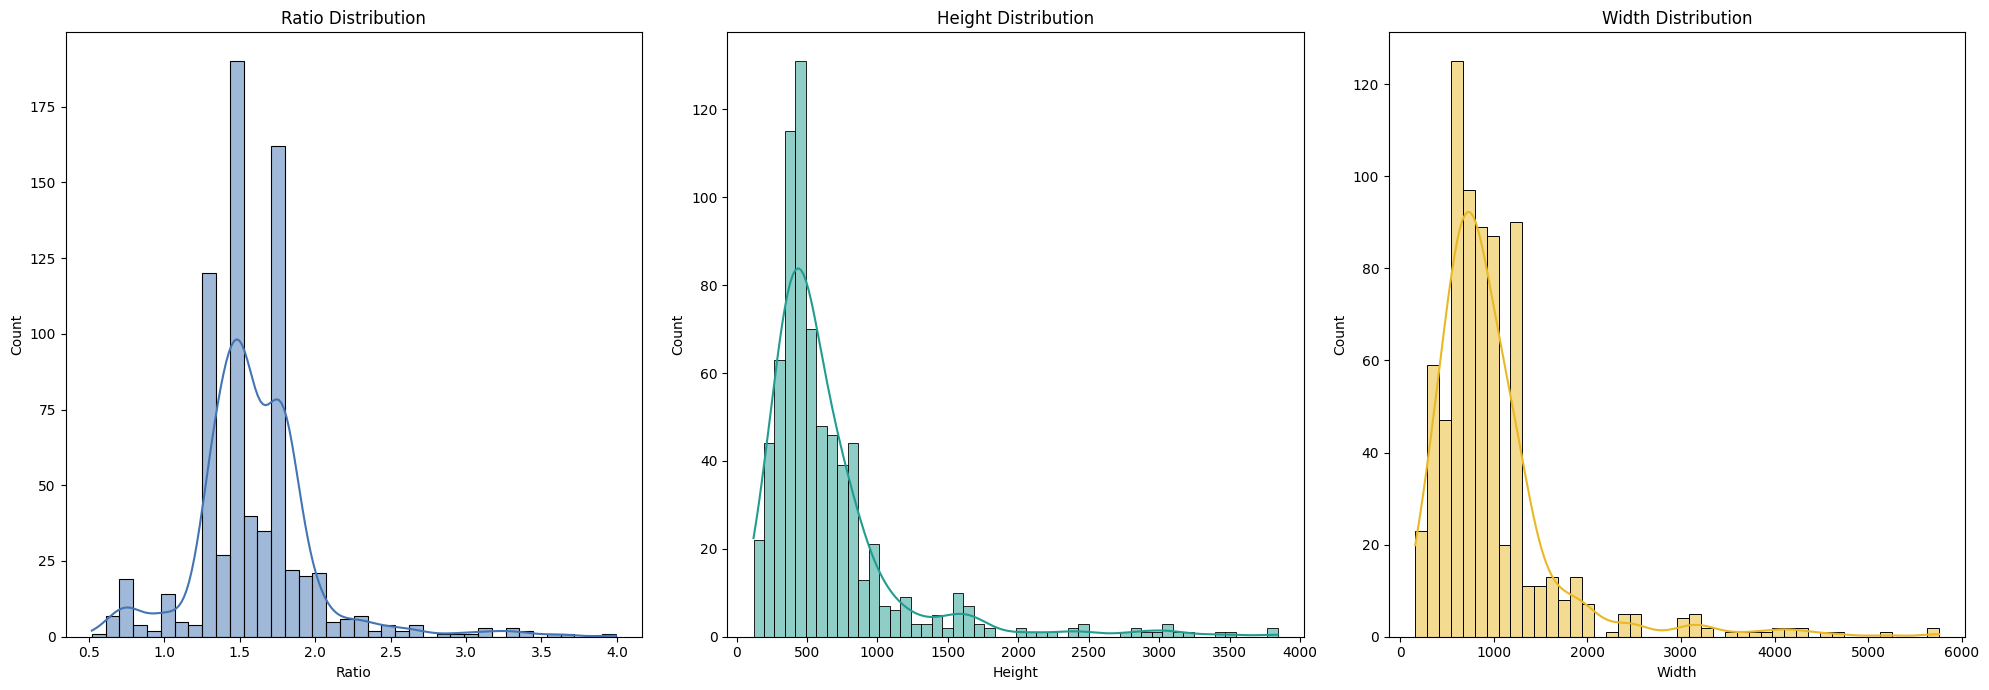

In [97]:
plt.figure(figsize=biplot_fig_size)

# Subplot 3: Histogram for Width
plt.subplot(1, 3, 1)
sns.histplot(data=image_data, x="Ratio", kde=True, color="#4374B3")  # Add KDE for better distribution visualization
plt.title('Ratio Distribution')

# Subplot 2: Histogram for Height
plt.subplot(1, 3, 2)
sns.histplot(data=image_data, x="Height", kde=True, color="#219C90")  # Add KDE for better distribution visualization
plt.title('Height Distribution')

# Subplot 3: Histogram for Width
plt.subplot(1, 3, 3)
sns.histplot(data=image_data, x="Width", kde=True, color="#E9B824")  # Add KDE for better distribution visualization
plt.title('Width Distribution')

plt.tight_layout()

plt.show()

We noitice that the height distribution is more dense towards the 500 pixel mark. So we use the mean height and mean ratio to come up with the usable height and width for further implementations

In [98]:
mean_ratio = np.mean(image_data["Ratio"])
scale_height = np.mean(image_data["Height"])
scale_width = scale_height * mean_ratio
print(f"Height: {int(scale_height)}\nWidth: {int(scale_width)}")

Height: 646
Width: 1033


We now finalize the height and width to be used